In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

# attempt to use gpu if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
# downloading and preparing our datasets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# classes used in cifar 10 dataset
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


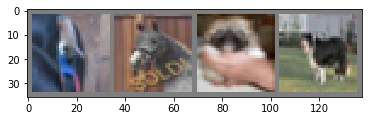

 bird horse   dog   dog


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# here we check that the images are fine and display a few of them


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

# this is our net used for training, it containts 2 conv layers and 3 fully connected layers
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 150, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(150, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 160)
        self.fc2 = nn.Linear(160, 140)
        self.fc3 = nn.Linear(140, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# create net and carry over to device (hopefully the gpu)
net = Net()
net = net.to(device)
print(net)

Net(
  (conv1): Conv2d(3, 150, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(150, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=160, bias=True)
  (fc2): Linear(in_features=160, out_features=140, bias=True)
  (fc3): Linear(in_features=140, out_features=10, bias=True)
)


In [6]:
import torch.optim as optim

# initializing our optimizers for tweaking weights and criterions for calculating errors
# our initial learning rate is set to 0.001, however, it will change later on in order to reach least loss
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
# first two epochs using initial learning rate
for epoch in range(2):
    
    running_loss = 0.0
     
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # this is used for carrying data over to the device used (hopefully gpu)
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
    
        outputs = net(inputs)
        loss = criterion(outputs, labels)
    
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
        if i % 2000 == 1999:  
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.044
[1,  4000] loss: 1.674
[1,  6000] loss: 1.536
[1,  8000] loss: 1.466
[1, 10000] loss: 1.380
[1, 12000] loss: 1.323
[2,  2000] loss: 1.255
[2,  4000] loss: 1.206
[2,  6000] loss: 1.187
[2,  8000] loss: 1.173
[2, 10000] loss: 1.121
[2, 12000] loss: 1.119
Finished Training


In [8]:
# after first two epochs we decrease the learning rate to get least loss 
# and avoid getting stuck with higher learning rate
for g in optimizer.param_groups:
    g['lr'] = 0.0003
for epoch in range(3):
    
    running_loss = 0.0
     
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # this is used for carrying data over to the device used (hopefully gpu)
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
    
        outputs = net(inputs)
        loss = criterion(outputs, labels)
    
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
        if i % 2000 == 1999:  
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 0.927
[1,  4000] loss: 0.893
[1,  6000] loss: 0.899
[1,  8000] loss: 0.903
[1, 10000] loss: 0.891
[1, 12000] loss: 0.898
[2,  2000] loss: 0.823
[2,  4000] loss: 0.839
[2,  6000] loss: 0.846
[2,  8000] loss: 0.817
[2, 10000] loss: 0.808
[2, 12000] loss: 0.824
[3,  2000] loss: 0.769
[3,  4000] loss: 0.776
[3,  6000] loss: 0.784
[3,  8000] loss: 0.771
[3, 10000] loss: 0.785
[3, 12000] loss: 0.778
Finished Training


In [9]:
# we decrease the learning rate even further
for g in optimizer.param_groups:
    g['lr'] = 0.000035
    
for epoch in range(2):
    
    running_loss = 0.0
     
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
    
        outputs = net(inputs)
        loss = criterion(outputs, labels)
    
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
        if i % 2000 == 1999:  
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 0.690
[1,  4000] loss: 0.657
[1,  6000] loss: 0.672
[1,  8000] loss: 0.636
[1, 10000] loss: 0.639
[1, 12000] loss: 0.649
[2,  2000] loss: 0.635
[2,  4000] loss: 0.645
[2,  6000] loss: 0.631
[2,  8000] loss: 0.638
[2, 10000] loss: 0.636
[2, 12000] loss: 0.632
Finished Training


In [10]:
# finally, we decrease learning rate even further and do two more epochs with smallest learning rate so far#
for g in optimizer.param_groups:
    g['lr'] = 0.000006
    
for epoch in range(2):
    
    running_loss = 0.0
     
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
    
        outputs = net(inputs)
        loss = criterion(outputs, labels)
    
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
        if i % 2000 == 1999:  
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 0.598
[1,  4000] loss: 0.596
[1,  6000] loss: 0.607
[1,  8000] loss: 0.626
[1, 10000] loss: 0.633
[1, 12000] loss: 0.639
[2,  2000] loss: 0.612
[2,  4000] loss: 0.606
[2,  6000] loss: 0.603
[2,  8000] loss: 0.627
[2, 10000] loss: 0.625
[2, 12000] loss: 0.608
Finished Training


In [11]:
for g in optimizer.param_groups:
    g['lr'] = 0.000001
    
for epoch in range(2):
    
    running_loss = 0.0
     
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
    
        outputs = net(inputs)
        loss = criterion(outputs, labels)
    
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
        if i % 2000 == 1999:  
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 0.589
[1,  4000] loss: 0.604
[1,  6000] loss: 0.630
[1,  8000] loss: 0.604
[1, 10000] loss: 0.618
[1, 12000] loss: 0.609
[2,  2000] loss: 0.608
[2,  4000] loss: 0.605
[2,  6000] loss: 0.608
[2,  8000] loss: 0.598
[2, 10000] loss: 0.609
[2, 12000] loss: 0.620
Finished Training


In [12]:
# here we get one random batch and see how our model does on it
# and compare to actual result
dataiter = iter(testloader)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)

    
print('Ground truth: ', ' '.join('%5s' % classes[labels[j]] for j in
                                     range(4)))
    
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Ground truth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane


In [13]:
# path where we store our successful model
PATH = './cifar_net.pth'

In [ ]:
# saving the model
torch.save(net.state_dict(), PATH)

In [14]:
# creating new net with parameters from previous best model
net = Net()
net.to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [15]:
# now we check how our model does on the test set 
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 71 %


In [16]:
# finally we output separate accuracy scores for each class
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
    
    
for i in range(10):
     print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 78 %
Accuracy of   car : 83 %
Accuracy of  bird : 59 %
Accuracy of   cat : 49 %
Accuracy of  deer : 67 %
Accuracy of   dog : 57 %
Accuracy of  frog : 82 %
Accuracy of horse : 75 %
Accuracy of  ship : 81 %
Accuracy of truck : 79 %
